While the RSI we studied earlier looks at a single stock's momentum, traders also care about how a stock performs **compared to its peers**. This is called **Relative Strength Comparison**.

---

## Concept 4: Relative Strength (vs. The Market)

### 1. The Math: "The Ratio"

To see if Apple (AAPL) is actually a leader or just floating up because everything else is, we divide the price of the stock by the price of a benchmark (like the S&P 500, ticker: `SPY`).

$$\text{Relative Strength Ratio} = \frac{\text{Price of Stock}}{\text{Price of Benchmark}}$$

- **If the ratio is going UP:** The stock is outperforming the market (Alpha).
    
- **If the ratio is going DOWN:** The stock is underperforming, even if its price is technically rising.
    

---

### 2. The Visualization: "The Leaderboard"

Imagine the market is a rising tide. Most boats (stocks) will rise. But the "Relative Strength" line shows us which boats have their own motors running and are moving faster than the tide.

---

### What is SPY?

Think of **SPY** as a "basket" of the 500 largest companies in the US (like Apple, Microsoft, Amazon, and Nvidia).

- **The Concept:** It is an **ETF** (Exchange Traded Fund) that tracks the **S&P 500 Index**.
    
- **The Purpose:** Instead of buying 500 separate stocks, you buy one share of SPY.
    
- **The "Yardstick":** In trading, we use SPY as the **Benchmark**. If your strategy makes 10%, but SPY made 20%, you actually "lost" compared to just leaving your money in the market average.

### 3. VectorBT Implementation

VectorBT is designed to handle multiple tickers at once, making this comparison very fast.




Relative Strength (Last 5 days):
Date
2025-12-18 05:00:00+00:00    0.403557
2025-12-19 05:00:00+00:00    0.402107
2025-12-22 05:00:00+00:00    0.395675
2025-12-23 05:00:00+00:00    0.395895
2025-12-24 05:00:00+00:00    0.396608
dtype: float64


/usr/local/lib/python3.12/site-packages/vectorbt/data/base.py:528: UserWarning:

Symbols have mismatching columns. Dropping missing data points.



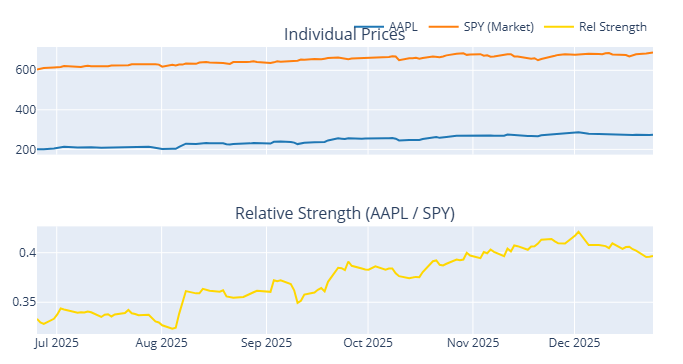

In [5]:
import vectorbt as vbt
import plotly.graph_objects as go
import pandas as pd

# 1. Download with the 'missing_columns' fix
# This tells VectorBT: "If one has Dividends and the other doesn't, just drop them."
data = vbt.YFData.download(
    ['AAPL', 'SPY'], 
    period='6mo', 
    missing_columns='drop' 
)

# 2. Extract the Close prices
prices = data.get('Close')

# 3. Calculate the Ratio (AAPL price divided by SPY price)
# This shows how many "shares" of the market (SPY) it takes to buy one AAPL

aapl_price=prices['AAPL']
spy_price=prices['SPY']
rel_strength =aapl_price /spy_price

print("Relative Strength (Last 5 days):")
print(rel_strength.tail())
# 3. Visualize
fig = vbt.make_subplots(rows=2, cols=1, shared_xaxes=True,
                        subplot_titles=("Individual Prices", "Relative Strength (AAPL / SPY)"))

fig.add_trace(go.Scatter(x=aapl_price.index, y=aapl_price, name='AAPL'), row=1, col=1)
fig.add_trace(go.Scatter(x=spy_price.index, y=spy_price, name='SPY (Market)'), row=1, col=1)

# The Ratio line: When this goes up, AAPL is winning.
fig.add_trace(go.Scatter(x=rel_strength.index, y=rel_strength, name='Rel Strength', line=dict(color='gold')), row=2, col=1)

fig.show()